In [3]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

import math
from sklearn.metrics import mean_squared_error

In [4]:
key="3cf3e864d482454ae284accea58595c8eeb43ef0"

In [8]:
df = pdr.get_data_tiingo('TSLA', api_key=key)
df.to_csv('TSLA.csv')
df=pd.read_csv('AAPL.csv')

In [9]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-08-17 00:00:00+00:00,117.16,117.65,115.5000,116.040,40884745,108.253598,108.706348,106.719789,107.218739,40884745,0.00,1.0
1,AAPL,2015-08-18 00:00:00+00:00,116.50,117.44,116.0100,116.430,34560708,107.643770,108.512312,107.191020,107.579092,34560708,0.00,1.0
2,AAPL,2015-08-19 00:00:00+00:00,115.01,116.52,114.6800,116.100,48286510,106.267039,107.662250,105.962125,107.274178,48286510,0.00,1.0
3,AAPL,2015-08-20 00:00:00+00:00,112.65,114.35,111.6300,114.080,68501622,104.086444,105.657211,103.143984,105.407737,68501622,0.00,1.0
4,AAPL,2015-08-21 00:00:00+00:00,105.76,111.90,105.6450,110.430,128275471,97.720216,103.393458,97.613958,102.035207,128275471,0.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,AAPL,2020-08-07 00:00:00+00:00,444.45,454.70,441.1700,452.820,49511403,444.450000,454.700000,441.170000,452.820000,49511403,0.82,1.0
1254,AAPL,2020-08-10 00:00:00+00:00,450.91,455.10,440.0000,450.400,53100856,450.910000,455.100000,440.000000,450.400000,53100856,0.00,1.0
1255,AAPL,2020-08-11 00:00:00+00:00,437.50,449.93,436.4267,447.875,46975594,437.500000,449.930000,436.426700,447.875000,46975594,0.00,1.0
1256,AAPL,2020-08-12 00:00:00+00:00,452.04,453.10,441.1900,441.990,41486205,452.040000,453.100000,441.190000,441.990000,41486205,0.00,1.0


In [10]:
df1=df.reset_index()['close']

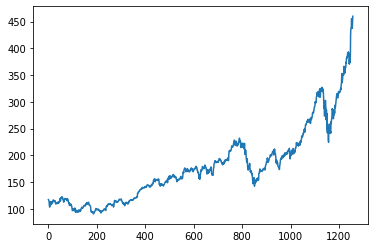

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [12]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [14]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [42]:
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [43]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [44]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
10/10 [==============================] - 3s 278ms/step - loss: 0.0129 - val_loss: 0.0256
Epoch 2/100
10/10 [==============================] - 2s 203ms/step - loss: 0.0026 - val_loss: 0.0195
Epoch 3/100
10/10 [==============================] - 2s 192ms/step - loss: 0.0011 - val_loss: 0.0117
Epoch 4/100
10/10 [==============================] - 2s 188ms/step - loss: 4.6079e-04 - val_loss: 0.0035
Epoch 5/100
10/10 [==============================] - 2s 189ms/step - loss: 3.2316e-04 - val_loss: 0.0033
Epoch 6/100
10/10 [==============================] - 2s 188ms/step - loss: 2.6291e-04 - val_loss: 0.0048
Epoch 7/100
10/10 [==============================] - 2s 197ms/step - loss: 2.5303e-04 - val_loss: 0.0042
Epoch 8/100
10/10 [==============================] - 2s 194ms/step - loss: 2.4789e-04 - val_loss: 0.0035
Epoch 9/100
10/10 [==============================] - 2s 190ms/step - loss: 2.4432e-04 - val_loss: 0.0039
Epoch 10/100
10/10 [==============================] - 2s 193ms/step

Epoch 72/100
10/10 [==============================] - 2s 187ms/step - loss: 1.4393e-04 - val_loss: 0.0025
Epoch 73/100
10/10 [==============================] - 2s 186ms/step - loss: 1.4442e-04 - val_loss: 0.0020
Epoch 74/100
10/10 [==============================] - 2s 188ms/step - loss: 1.4226e-04 - val_loss: 0.0037
Epoch 75/100
10/10 [==============================] - 2s 191ms/step - loss: 1.5352e-04 - val_loss: 0.0015
Epoch 76/100
10/10 [==============================] - 2s 192ms/step - loss: 1.6070e-04 - val_loss: 0.0028
Epoch 77/100
10/10 [==============================] - 2s 190ms/step - loss: 1.7500e-04 - val_loss: 0.0019
Epoch 78/100
10/10 [==============================] - 2s 185ms/step - loss: 1.4918e-04 - val_loss: 0.0022
Epoch 79/100
10/10 [==============================] - 2s 188ms/step - loss: 1.4014e-04 - val_loss: 0.0033
Epoch 80/100
10/10 [==============================] - 2s 187ms/step - loss: 1.3862e-04 - val_loss: 0.0022
Epoch 81/100
10/10 [==========================

In [47]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [48]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [49]:
math.sqrt(mean_squared_error(y_train,train_predict))

157.63521403952652

In [50]:


### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))



288.59916369821246

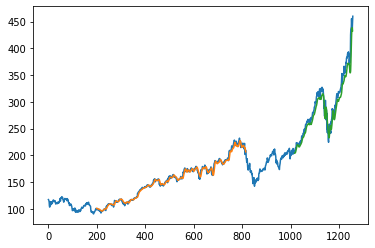

In [53]:


### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()



In [54]:


x_input=test_data[341:].reshape(1,-1)
x_input.shape



(1, 100)

In [55]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [56]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9074863]
101
1 day input [0.41974574 0.45469299 0.42575061 0.44487422 0.44346768 0.40727617
 0.41814985 0.40862862 0.46559372 0.45737084 0.47533135 0.48052475
 0.4947525  0.53208006 0.52499324 0.5311063  0.52058426 0.50470652
 0.48155261 0.50246146 0.49956722 0.52104409 0.52158507 0.5091696
 0.53391939 0.55033811 0.53754395 0.54860698 0.56050852 0.56881255
 0.57722478 0.59450906 0.60770895 0.59797133 0.58780092 0.59291317
 0.58796321 0.60757371 0.6026508  0.61912361 0.61268596 0.61820395
 0.61236137 0.61609413 0.61647282 0.6156343  0.62621044 0.63024074
 0.63505545 0.62748174 0.65231269 0.65761428 0.68609684 0.71003516
 0.66421423 0.67205843 0.68339194 0.70797944 0.70665404 0.70703273
 0.70159589 0.72634569 0.74706519 0.72956451 0.74249391 0.71217203
 0.73421693 0.74238572 0.74051934 0.74051934 0.76686503 0.76372735
 0.78720584 0.79164187 0.79345415 0.78866649 0.80576143 0.8129835
 0.79997295 0.79786313 0.81982689 0.8051393  0.80808764 0.76018393
 0.75769543 0.78144441 0.76459291 0.

14 day output [[0.5192775]]
15 day input [0.52499324 0.5311063  0.52058426 0.50470652 0.48155261 0.50246146
 0.49956722 0.52104409 0.52158507 0.5091696  0.53391939 0.55033811
 0.53754395 0.54860698 0.56050852 0.56881255 0.57722478 0.59450906
 0.60770895 0.59797133 0.58780092 0.59291317 0.58796321 0.60757371
 0.6026508  0.61912361 0.61268596 0.61820395 0.61236137 0.61609413
 0.61647282 0.6156343  0.62621044 0.63024074 0.63505545 0.62748174
 0.65231269 0.65761428 0.68609684 0.71003516 0.66421423 0.67205843
 0.68339194 0.70797944 0.70665404 0.70703273 0.70159589 0.72634569
 0.74706519 0.72956451 0.74249391 0.71217203 0.73421693 0.74238572
 0.74051934 0.74051934 0.76686503 0.76372735 0.78720584 0.79164187
 0.79345415 0.78866649 0.80576143 0.8129835  0.79997295 0.79786313
 0.81982689 0.8051393  0.80808764 0.76018393 0.75769543 0.78144441
 0.76459291 0.78393292 0.79637544 0.90532864 0.93429808 0.94216933
 0.94647011 0.98801731 0.95783067 0.9753043  0.93903165 0.97836083
 1.         0.9074863

28 day output [[0.50660336]]
29 day input [0.56050852 0.56881255 0.57722478 0.59450906 0.60770895 0.59797133
 0.58780092 0.59291317 0.58796321 0.60757371 0.6026508  0.61912361
 0.61268596 0.61820395 0.61236137 0.61609413 0.61647282 0.6156343
 0.62621044 0.63024074 0.63505545 0.62748174 0.65231269 0.65761428
 0.68609684 0.71003516 0.66421423 0.67205843 0.68339194 0.70797944
 0.70665404 0.70703273 0.70159589 0.72634569 0.74706519 0.72956451
 0.74249391 0.71217203 0.73421693 0.74238572 0.74051934 0.74051934
 0.76686503 0.76372735 0.78720584 0.79164187 0.79345415 0.78866649
 0.80576143 0.8129835  0.79997295 0.79786313 0.81982689 0.8051393
 0.80808764 0.76018393 0.75769543 0.78144441 0.76459291 0.78393292
 0.79637544 0.90532864 0.93429808 0.94216933 0.94647011 0.98801731
 0.95783067 0.9753043  0.93903165 0.97836083 1.         0.90748632
 0.89162034 0.8649317  0.83130777 0.7942847  0.75626379 0.71877486
 0.68285871 0.64929664 0.61869264 0.59148318 0.56792867 0.54811406
 0.53196514 0.51927751

In [57]:


day_new=np.arange(1,101)
day_pred=np.arange(101,131)



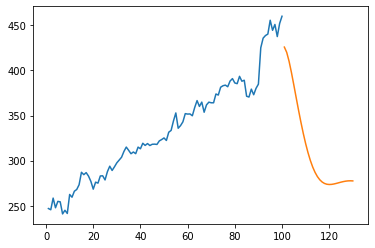

In [58]:


plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))



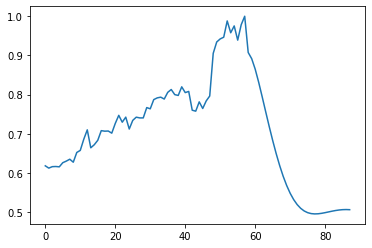

In [59]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

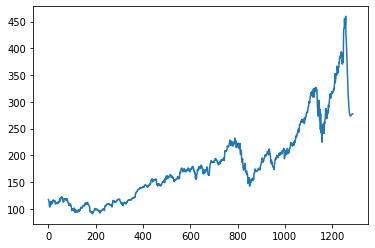

In [60]:
df3=scaler.inverse_transform(df3).tolist()


plt.plot(df3)

